In [114]:
%matplotlib inline
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import ConstraintsFeaturesTransform

In [52]:
def draw_clusters(X, labels, colors=None, show_plt=True, show_title=False, name=None, ax=None,
                  markersize=15, markeredgecolor='k', use_clustes_as_keys = False, linewidth=0,
                  noise_data_color='k'):
    import seaborn as sns
    if (ax == None):
        ax = plt

    unique_labels = np.unique(labels)
    label_map = sorted(unique_labels)
    if (colors == None):
        colors = sns.color_palette()
        if len(colors) < len(unique_labels):
            colors = plt.cm.Spectral(np.linspace(1, 0, len(unique_labels)))
    has_noise = False

    if not use_clustes_as_keys:
        if (label_map[0] == -1):
            if (isinstance(colors, list)):
                colors = [noise_data_color] + colors
            else:
                colors = [noise_data_color] + colors.tolist()

    #for k, col in zip(label_map, colors):
    for k, i in zip(label_map, xrange(len(label_map))):
        if k == -1:
            # Black used for noise.
            col = noise_data_color
            has_noise = True
        else:
            if use_clustes_as_keys:
                col = colors[int(k)]
            else:
                col = colors[i]
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], s=markersize, facecolor=col,
                 edgecolor=markeredgecolor, linewidth=linewidth)

    if (show_title):
        labels_count = len(unique_labels)
        if (has_noise):
            labels_count = labels_count - 1
        title_prefix = ""
        if (name != None):
            title_prefix = "%s - "%name
        if hasattr(ax, 'set_title'):
            ax.set_title((title_prefix + 'Estimated number of clusters: %d') % len(unique_labels))
        else:
            ax.title((title_prefix + 'Estimated number of clusters: %d') % len(unique_labels))

    return ax

In [89]:
def draw_points_with_indices(data, ax=None, markersize=30, col='blue', markeredgecolor='k', linewidth=0):
    
    x = data[:,0]
    y = data[:,1]
    
    if ax is None:
        ax = plt.gca()
    
    ax.scatter(x, y, s=markersize, facecolor=col,
         edgecolor=markeredgecolor, linewidth=linewidth)
    
    for i in range(len(x)):
        ax.annotate("%d"%i, (x[i] ,y[i]))

[[ 0.          1.41421356  2.82842712  4.24264069]
 [ 1.41421356  0.          4.24264069  5.65685425]
 [ 2.82842712  4.24264069  0.          1.41421356]
 [ 4.24264069  5.65685425  1.41421356  0.        ]]


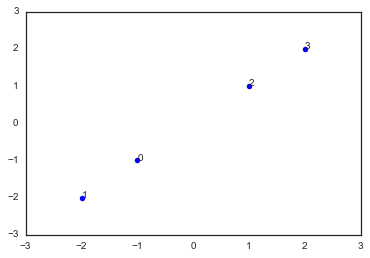

In [115]:
reload(ConstraintsFeaturesTransform)

data = [
    [-1,-1],
    [-2,-2],
    [1,1],
    [2,2]
]

mat = np.matrix(data)

print(squareform(pdist(data)))

plt.figure()
draw_points_with_indices(mat)

[[ 0.          8.60232527  6.16410877  7.34846925]
 [ 8.60232527  0.          7.34846925  6.63353321]
 [ 6.16410877  7.34846925  0.          8.60232527]
 [ 7.34846925  6.63353321  8.60232527  0.        ]]


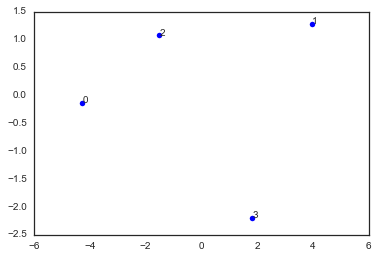

In [123]:
reload(ConstraintsFeaturesTransform)
#must_link = [[1,3]]
must_link = [[0,2]]
#must_link = None
cannot_link = [[0,1],[2,3]]
#cannot_link = None
transform = ConstraintsFeaturesTransform.ConstraintsFeaturesTransform()
constrained_dists = squareform(transform.transform(mat, must_link, cannot_link))
print(constrained_dists)

mds = MDS(n_components=len(mat), max_iter=100, n_init=1, dissimilarity='precomputed')

embedded_with_constraints = mds.fit_transform(constrained_dists)
draw_points_with_indices(embedded_with_constraints)